In [2]:
#importing data into jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("Salary_Data_Based_country_and_race.csv")
data.head()

#General information about the dataset
number_of_rows=data.shape[0]
number_of_columns=data.shape[1]
print(number_of_rows)
print(number_of_columns)

6704
9


In [43]:
#SORTING THE DATA
#Formatting the headings of the variables to snake case heading
data.columns=data.columns.str.lower()


In [8]:
#DATA CLEANING
#checking for missing values
data.isnull()
#There are no missing values

#FORMATTING WRONG DATA
data["education_level"]=data["education_level"].replace("Bachelor's","Bachelor's Degree")
data["education_level"]=data["education_level"].replace("Master's","Master's Degree")
data["education_level"]=data["education_level"].replace("phD","PhD")

In [45]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [46]:
#Filtering out the data to keep only rows with gender as male or female

data=data[data["gender"].isin(["Male","Female"])]

#mean salary earned by each gender
gender_group = data.groupby('gender')
mean_salary_by_gender = gender_group['salary'].mean()
print(mean_salary_by_gender)

gender
Female    107888.998672
Male      121389.870915
Name: salary, dtype: float64


On average,males earn a higher salry compared to females.

In [9]:
#Calculating the maximum and minimum salaries earned for each education level
new_group= data.groupby("education_level")
min_salaries = new_group["salary"].min()
max_salaries = new_group["salary"].max()

print("\nMinimum salary per education level:")
print(min_salaries)
print("\nMax salary per education level:")
print(max_salaries)


Minimum salary per education level:
education_level
Bachelor's Degree      350.0
High School          25000.0
Master's Degree      32000.0
PhD                    579.0
Name: salary, dtype: float64

Max salary per education level:
education_level
Bachelor's Degree    250000.0
High School          166109.0
Master's Degree      228000.0
PhD                  250000.0
Name: salary, dtype: float64


The maximum salary for individuals with a PHD and Bachelor's Degree is $250000 while those with a high school diploma earn a maximum salary of $166109.This indicates that as the level of education increases,so does the salary earned.


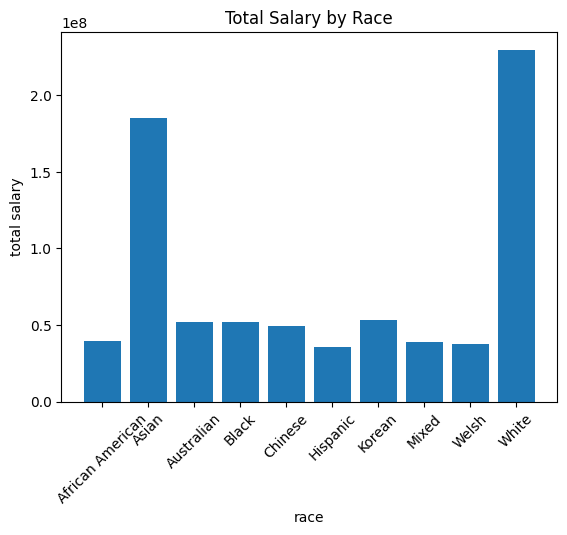

In [18]:
#DATA VISUALIZATION
#Calculating the total salary earned for each race
grouped_data=data.groupby("race")["salary"].sum()

#Visualizing the data
plt.bar(grouped_data.index,grouped_data.values)
plt.xlabel("race")
plt.ylabel("total salary")
plt.title("Total Salary by Race")

plt.xticks(rotation=45)               
plt.show()


The bar graph above indicates that Whites are high income earners,followed by Asians.
African American,the Hispanics,mixed race and the Welsh are low income earners.

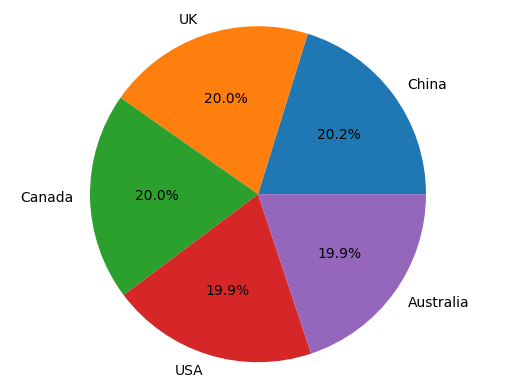

In [13]:
#PIE CHART SHOWING THE PERCENTAGE OF SALARY EARNED BY EACH COUNTRY
import matplotlib.pyplot as plt
grouped_data=data.groupby("country")["salary"].sum().reset_index()

#Calculating the percentage
total_salary=grouped_data["salary"].sum()
grouped_data["percentage"]=(grouped_data["salary"]/total_salary)*100

#sorting the data by percentage
grouped_data=grouped_data.sort_values("percentage",ascending=False)

#Creating the Pie Chart
plt.pie(grouped_data["percentage"],
labels=grouped_data["country"],
autopct="%1.1f%%")
plt.axis("equal")
plt.show()


The pie chart as shown above indicates that the pay scales in different countries are approximately equal.

In [ ]:
#USING A SCATTERPLOT TO VISUALIZE THE RELATIONSHIP BETWEEN SALARY AND YEARS OF EXPERIENCE
